# Ejemplo de árboles de decisión 
Los contenidos de este notebook están basados en el ejemplo del siguiente vídeo: https://www.youtube.com/watch?v=zs6yHVtxyv8

### 1) El objetivo es predecir el voto (republicano o demócrata) de un determinado elector en base a sus ingresos, nivel educativo, diversidad racial. 

Veamos cómo funciona un árbol de decisión con solo estas tres variables.

In [63]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from IPython.display import Image  
import pydotplus
from io import StringIO

El siguiente conjunto de sentencias son para construir nuestro dataset.

In [64]:
# cargamos los datos en un dataframe
json_string = '{"State":{"0":"California","1":"Colorado","2":"Connecticut","3":"Delaware","4":"D.C.","5":"Hawaii","6":"Illinois","7":"Maine","8":"Maryland","9":"Massachusetts","10":"Michigan","11":"Minnesota","12":"Nevada","13":"New Hampshire","14":"New Jersey","15":"New Mexico","16":"New York","17":"Oregon","18":"Rhode Island","19":"Vermont","20":"Virginia","21":"Washington","22":"Pennsylvania","23":"Wisconsin","24":"Alabama","25":"Alaska","26":"Arizona","27":"Arkansas","28":"Florida","29":"Georgia","30":"Idaho","31":"Indiana","32":"Iowa","33":"Kansas","34":"Kentucky","35":"Louisiana","36":"Mississippi","37":"Missouri","38":"Montana","39":"Nebraska","40":"North Carolina","41":"North Dakota","42":"Ohio","43":"Oklahoma","44":"South Carolina","45":"South Dakota","46":"Tennessee","47":"Texas","48":"Utah","49":"West Virginia","50":"Wyoming"},"Median_income":{"0":70489,"1":73034,"2":72812,"3":65012,"4":85750,"5":80108,"6":70145,"7":58663,"8":86223,"9":86345,"10":60449,"11":71817,"12":61864,"13":81346,"14":74176,"15":48283,"16":67274,"17":69165,"18":62266,"19":70066,"20":77151,"21":79726,"22":64524,"23":62629,"24":49936,"25":68734,"26":62283,"27":49781,"28":54644,"29":55821,"30":58728,"31":59892,"32":68718,"33":63938,"34":54555,"35":49973,"36":42781,"37":61726,"38":57679,"39":67575,"40":53369,"41":66505,"42":61633,"43":54434,"44":57444,"45":59463,"46":56060,"47":59785,"48":77067,"49":50573,"50":62539},"%_Bachelors_degree_or_higher":{"0":0.33,"1":0.39,"2":0.38,"3":0.31,"4":0.57,"5":0.32,"6":0.33,"7":0.3,"8":0.39,"9":0.42,"10":0.28,"11":0.35,"12":0.24,"13":0.36,"14":0.38,"15":0.27,"16":0.35,"17":0.32,"18":0.33,"19":0.37,"20":0.38,"21":0.35,"22":0.3,"23":0.29,"24":0.25,"25":0.29,"26":0.28,"27":0.22,"28":0.29,"29":0.3,"30":0.27,"31":0.25,"32":0.28,"33":0.32,"34":0.23,"35":0.23,"36":0.21,"37":0.28,"38":0.31,"39":0.31,"40":0.3,"41":0.29,"42":0.27,"43":0.25,"44":0.27,"45":0.28,"46":0.26,"47":0.29,"48":0.33,"49":0.2,"50":0.27},"%_White":{"0":0.37,"1":0.68,"2":0.66,"3":0.62,"4":0.37,"5":0.21,"6":0.61,"7":0.93,"8":0.5,"9":0.71,"10":0.75,"11":0.8,"12":0.49,"13":0.9,"14":0.55,"15":0.37,"16":0.55,"17":0.75,"18":0.72,"19":0.93,"20":0.62,"21":0.68,"22":0.76,"23":0.81,"24":0.66,"25":0.6,"26":0.54,"27":0.72,"28":0.53,"29":0.52,"30":0.82,"31":0.79,"32":0.86,"33":0.76,"34":0.85,"35":0.59,"36":0.57,"37":0.8,"38":0.86,"39":0.79,"40":0.63,"41":0.84,"42":0.79,"43":0.65,"44":0.64,"45":0.82,"46":0.74,"47":0.41,"48":0.78,"49":0.92,"50":0.84},"Political_Leaning":{"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0,"8":0,"9":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":2,"23":2,"24":1,"25":1,"26":1,"27":1,"28":1,"29":1,"30":1,"31":1,"32":1,"33":1,"34":1,"35":1,"36":1,"37":1,"38":1,"39":1,"40":1,"41":1,"42":1,"43":1,"44":1,"45":1,"46":1,"47":1,"48":1,"49":1,"50":1}}'
#Political_Leaning o Inclinación Política es la variable objetivo.
df = pd.read_json(StringIO(json_string)) #convierte la cadena de texto en objeto.

In [65]:
# transformación de variables para tener variables categóricas a partir de los datos.
df['income'] = df['Median_income']>df['Median_income'].median()  #Compara el ingreso medio. Si el ingreso medio de un estado es mayor que la mediana, el valor de income será True; de lo contrario, será False.
df['education'] = df['%_Bachelors_degree_or_higher']>df['%_Bachelors_degree_or_higher'].median() #Compara el porcentaje de personas con al menos un título universitario en cada estado. Si el valor es mayor que la mediana, se establece como True; si es menor o igual, como False.
df['diversity'] = df['%_White']<df['%_White'].median() #Compara el porcentaje de personas blancas (%_White) en cada estado con la mediana.
df.head()

,State,Median_income,%_Bachelors_degree_or_higher,%_White,Political_Leaning,income,education,diversity
0,California,70489,0.33,0.37,0,True,True,True
1,Colorado,73034,0.39,0.68,0,True,True,True
2,Connecticut,72812,0.38,0.66,0,True,True,True
3,Delaware,65012,0.31,0.62,0,True,True,True
4,D.C.,85750,0.57,0.37,0,True,True,True


In [66]:
feature_cols = ['income','education','diversity']
X = df[feature_cols] # Características
y = df.Political_Leaning # Variable objetivo


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)


# Creamos el objeto DTC
clf = DecisionTreeClassifier(criterion="entropy") #entropy es una medida de la impureza de los datos en ese nodo. Un valor de entropía cercano a 0 = datos son muy puros (todos pertenecen a la misma clase),cercano a 1 = son muy impuros (hay una mezcla de clases).

# Entrenamos el modelo
clf = clf.fit(X_train,y_train)

# Realizamos predicciones
y_pred = clf.predict(X_test)

In [67]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8076923076923077


In [68]:
new_data = {
    'income': [True, False, True],  # Por ejemplo: alto ingreso, bajo ingreso, alto ingreso
    'education': [True, True, False],  # Alto nivel educativo, alto nivel educativo, bajo nivel educativo
    'diversity': [False, True, False]  # Baja diversidad, alta diversidad, baja diversidad
}

new_df = pd.DataFrame(new_data)

# Paso 2: Usar el modelo para predecir
new_predictions = clf.predict(new_df)

# Paso 3: Mostrar las predicciones
print(new_predictions)

[0 0 1]


### 2) Controlar la complejidad de los árboles de decision - Cancer

Construir un árbol de decisión tal y como hemos explicado hasta alcanzar hojas puras se traduce en modelos muy complejos y muy ajustados a los datos.

Que existan hojas puras, significa que hay un 100% de exactitud (accuracy) en los datos de entrenamiento; cada instancia de datos del conjunto de entrenamiento está en una hoja correcta. Esto nos lleva a tener un sobreajuste en el entrenamiento, que posteriormente se traducirá en que el modelo no será capaz de generalizar el aprendizaje.

In [69]:
from sklearn.datasets import load_breast_cancer  #carga de dataset de cancer
#BD Cancer
cancer = load_breast_cancer()  #https://scikit-learn.org/dev/modules/generated/sklearn.datasets.load_breast_cancer.html
#En cancer.target y dice si es benigno o maligno
# Crear un DataFrame

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
print(df.shape)
df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [71]:
#target es donde indica si tiene tumor maligno o benigno
print(cancer.target.shape)
cancer.target

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [72]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy para datos de entrenamiento: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy para datos de test: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy para datos de entrenamiento: 1.000
Accuracy para datos de test: 0.937


El sobreajuste aparece cuando entrenamos un modelo de manera muy específica con unos datos. En los árboles es especialmente delicado, ya que si el árbol crece demasiado aparecerá el sobreajuste. Un modelo con sobreajuste será un modelo que no será capaz de hacer predicciones cuando lleguen datos diferentes a los ya conocidos.

Por lo tanto, existe sobreajuste si obtenemos un conjunto de reglas de clasificación o decisión que funciona muy bien en el entrenamiento pero el algoritmo no es capaz de generalizar los resultados.

El problema del sobreajuste se considera cuando el algoritmo continúa profundizando cada vez más para reducir el error del conjunto de entrenamiento, pero da como resultado un error mayor del conjunto de prueba.

_Para evalúar si hay sobre ajuste comparamos accuracy en training y test._

Si el rendimiento del modelo en el conjunto de datos de entrenamiento es **significativamente** mejor que el rendimiento en el conjunto de datos de test, es posible que el modelo se haya sobreajustado al conjunto de datos de entrenamiento.

**Reducir overfitting**

* Las técnicas de prepoda: Tratan de detener el crecimiento natural del árbol, que se produce al aplicar el algoritmo antes de que su nivel de ajuste sea muy elevado.

* Las técnicas de pospoda: Permiten que el árbol crezca y, posteriormente, se realice una poda sobre aquellos nodos que aportan poca información.

Algunos criterios para realizar la prepoda: limitar la profundidad máxima del árbol, requerir un mínimo número de instancias en un nodo para que sea particionado o limitar el número máximo de hojas.

scikit-learn *solo* tiene implementadas las técnicas de prepoda.

In [73]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy para datos de entrenamiento: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy para datos de test: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy para datos de entrenamiento: 0.988
Accuracy para datos de test: 0.951


### Visualización de los árboles

[Text(0.5555555555555556, 0.875, 'x[1] <= 0.5\nentropy = 0.943\nsamples = 25\nvalue = [16, 9]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 0.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]'),
 Text(0.2222222222222222, 0.375, 'x[2] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.625, 'x[2] <= 0.5\nentropy = 0.391\nsamples = 13\nvalue = [12, 1]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]')]

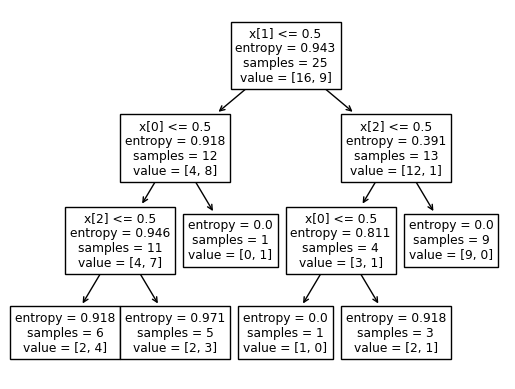

In [74]:
#De las tres caracteristicas de predecir el voto (republicano o demócrata)
plot_tree(clf)

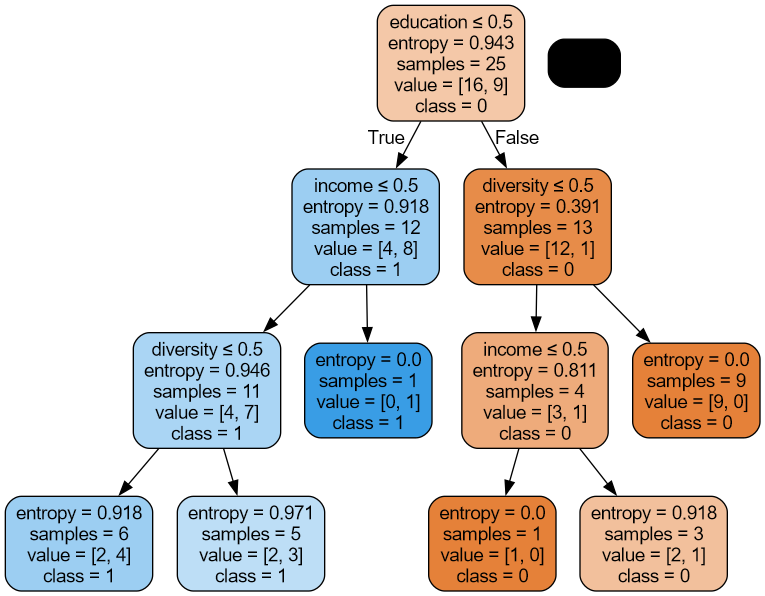

In [75]:
#Para visualizarlo mejor
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('redblue.png')
Image(graph.create_png())